In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/ev_data.csv')

In [3]:
df.sample(5)

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
550,27,Pune,None,Single,Graduate,4,2.083677e+06,No,SUV,Maybe,Honda,<5 lakhs,4
942,27,Pune,Working Professional,Married,Graduate,5,3.051231e+06,Yes,Sedan,No,Hyundai,<5 lakhs,3
357,29,Pune,None,Single,Graduate,4,1.064091e+06,Maybe,Liftback,Yes,Honda,<15 lakhs,4
674,25,Ahmedabad,None,Single,Post Graduate,4,6.662585e+05,Yes,SUV,Maybe,Suzuki,>25 lakhs,4
102,28,Pune,None,Single,Post Graduate,4,2.105553e+06,Yes,Liftback,Yes,Hyundai,>25 lakhs,2


In [4]:
df.isnull().sum()

age                        0
city                       0
profession                 0
marital_stat               0
education                  0
family_count               0
annual_income              0
replace_with_ev            0
preferred_ev_type          0
think_ev_are_economical    0
preferred_brand            0
preferred_price_range      0
preferred_wheel_count      0
dtype: int64

In [5]:
df.shape

(990, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               990 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [7]:
df.describe()

,age,family_count,annual_income,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000
mean,31.802020,4.116162,2.261180e+06,3.350505
std,11.279929,1.469488,1.001444e+06,0.886578
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.794900e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.758737e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [8]:
df1 = df.drop(['profession', 'education', 'think_ev_are_economical', 'family_count'], axis = 1)
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,<5 lakhs,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,<15 lakhs,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,<5 lakhs,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,<25 lakhs,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,<15 lakhs,4


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df1['replace_with_ev'].value_counts()


Yes      655
Maybe    200
No       135
Name: replace_with_ev, dtype: int64

majority want to replace with ev

In [11]:
y = df1['marital_stat'].value_counts()
y

Single     631
Married    359
Name: marital_stat, dtype: int64

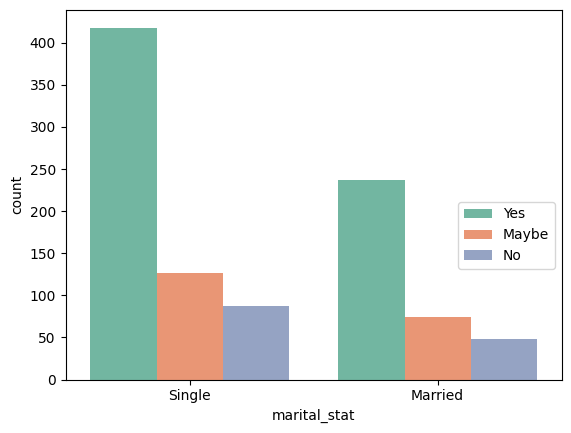

In [12]:
sns.countplot(x ='marital_stat', hue = 'replace_with_ev',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
z = df1['preferred_brand'].value_counts()
z

Tata             184
Hyundai          164
Honda            143
KIA              142
Nissan           121
Maruti            58
MG                55
Volkswagen        42
McLaren           18
Chevrolet         13
BMW               12
Maruti Suzuki     11
Audi               9
Suzuki             7
Maruti             7
Nexa               4
Name: preferred_brand, dtype: int64

In [14]:
k = df1['preferred_ev_type'].value_counts()
k

SUV          462
Sedan        237
Hatchback    144
Liftback     118
Cabrio        29
Name: preferred_ev_type, dtype: int64

In [15]:
j=df1['preferred_price_range'].value_counts()
j

<15 lakhs    479
<5 lakhs     285
<25 lakhs    145
>25 lakhs     34
1200000       14
2000000       12
1500000       11
700000        10
Name: preferred_price_range, dtype: int64

In [16]:
df1['preferred_price_range'] = df1['preferred_price_range'].replace({'<15 lakhs' : '15','<5 lakhs' : '5','<25 lakhs' : '25','>25 lakhs' : '30','1200000' : '12','2000000' : '20','1500000' : '15','700000' : '7'})
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Single,1.770466e+06,Yes,SUV,MG,5,2
1,27,Ahmedabad,Single,7.600731e+05,Yes,SUV,Nissan,15,4
2,28,Pune,Single,2.779701e+06,Maybe,Sedan,Honda,5,4
3,26,Pune,Single,1.473698e+06,Yes,Sedan,Tata,25,2
4,25,Pune,Single,2.430643e+06,Yes,Sedan,Hyundai,15,4


In [17]:
p = df1['preferred_ev_type'].value_counts()
p

SUV          462
Sedan        237
Hatchback    144
Liftback     118
Cabrio        29
Name: preferred_ev_type, dtype: int64

In [18]:
pwc = df1['preferred_wheel_count'].value_counts()
pwc

4    623
2    276
3     91
Name: preferred_wheel_count, dtype: int64

In [19]:
c = df1['city'].value_counts()
c

Pune           565
Mumbai          45
Pune            37
Delhi           24
Nagpur          22
Satara          21
New Delhi       19
Nellore         17
Banglore        15
Noida           15
Chennai         14
Kashipur        13
Nashik          12
Ahmedabad       12
Chandrapur      12
Mumbai          11
Haldwani        11
Hakdwani        10
Faridabad        9
Delhi            8
Gurugram         8
pune             8
Rewari           8
Patiyala         8
Nabha            8
Bengaluru        8
Serampore        7
Karnal           7
Jalandhar        6
Haldwani         6
solapur          5
pUNE             5
New Delhi        5
nashik           5
Jhansi           4
Name: city, dtype: int64

In [20]:
df1["city"] = df1["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["city"] = df1["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["city"] = df1["city"].replace({"Banglore ":"Bengaluru"})
df1["city"] = df1["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["city"] = df1["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["city"] = df1["city"].replace({"nashik":"Nashik"})

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    990 non-null    int64  
 1   city                   990 non-null    object 
 2   marital_stat           990 non-null    object 
 3   annual_income          990 non-null    float64
 4   replace_with_ev        990 non-null    object 
 5   preferred_ev_type      990 non-null    object 
 6   preferred_brand        990 non-null    object 
 7   preferred_price_range  990 non-null    object 
 8   preferred_wheel_count  990 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 69.7+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [23]:
df1.columns

Index(['age', 'city', 'marital_stat', 'annual_income', 'replace_with_ev',
       'preferred_ev_type', 'preferred_brand', 'preferred_price_range',
       'preferred_wheel_count'],
      dtype='object')

In [24]:
df1['city'] = le.fit_transform(df1['city'].astype(str))
df1['marital_stat'] = le.fit_transform(df1['marital_stat'].astype(str))
df1['replace_with_ev'] = le.fit_transform(df1['replace_with_ev'].astype(str))
df1['preferred_ev_type'] = le.fit_transform(df1['preferred_ev_type'].astype(str))
df1['preferred_brand'] = le.fit_transform(df1['preferred_brand'].astype(str))
df1['preferred_price_range'] = le.fit_transform(df1['preferred_price_range'].astype(str))

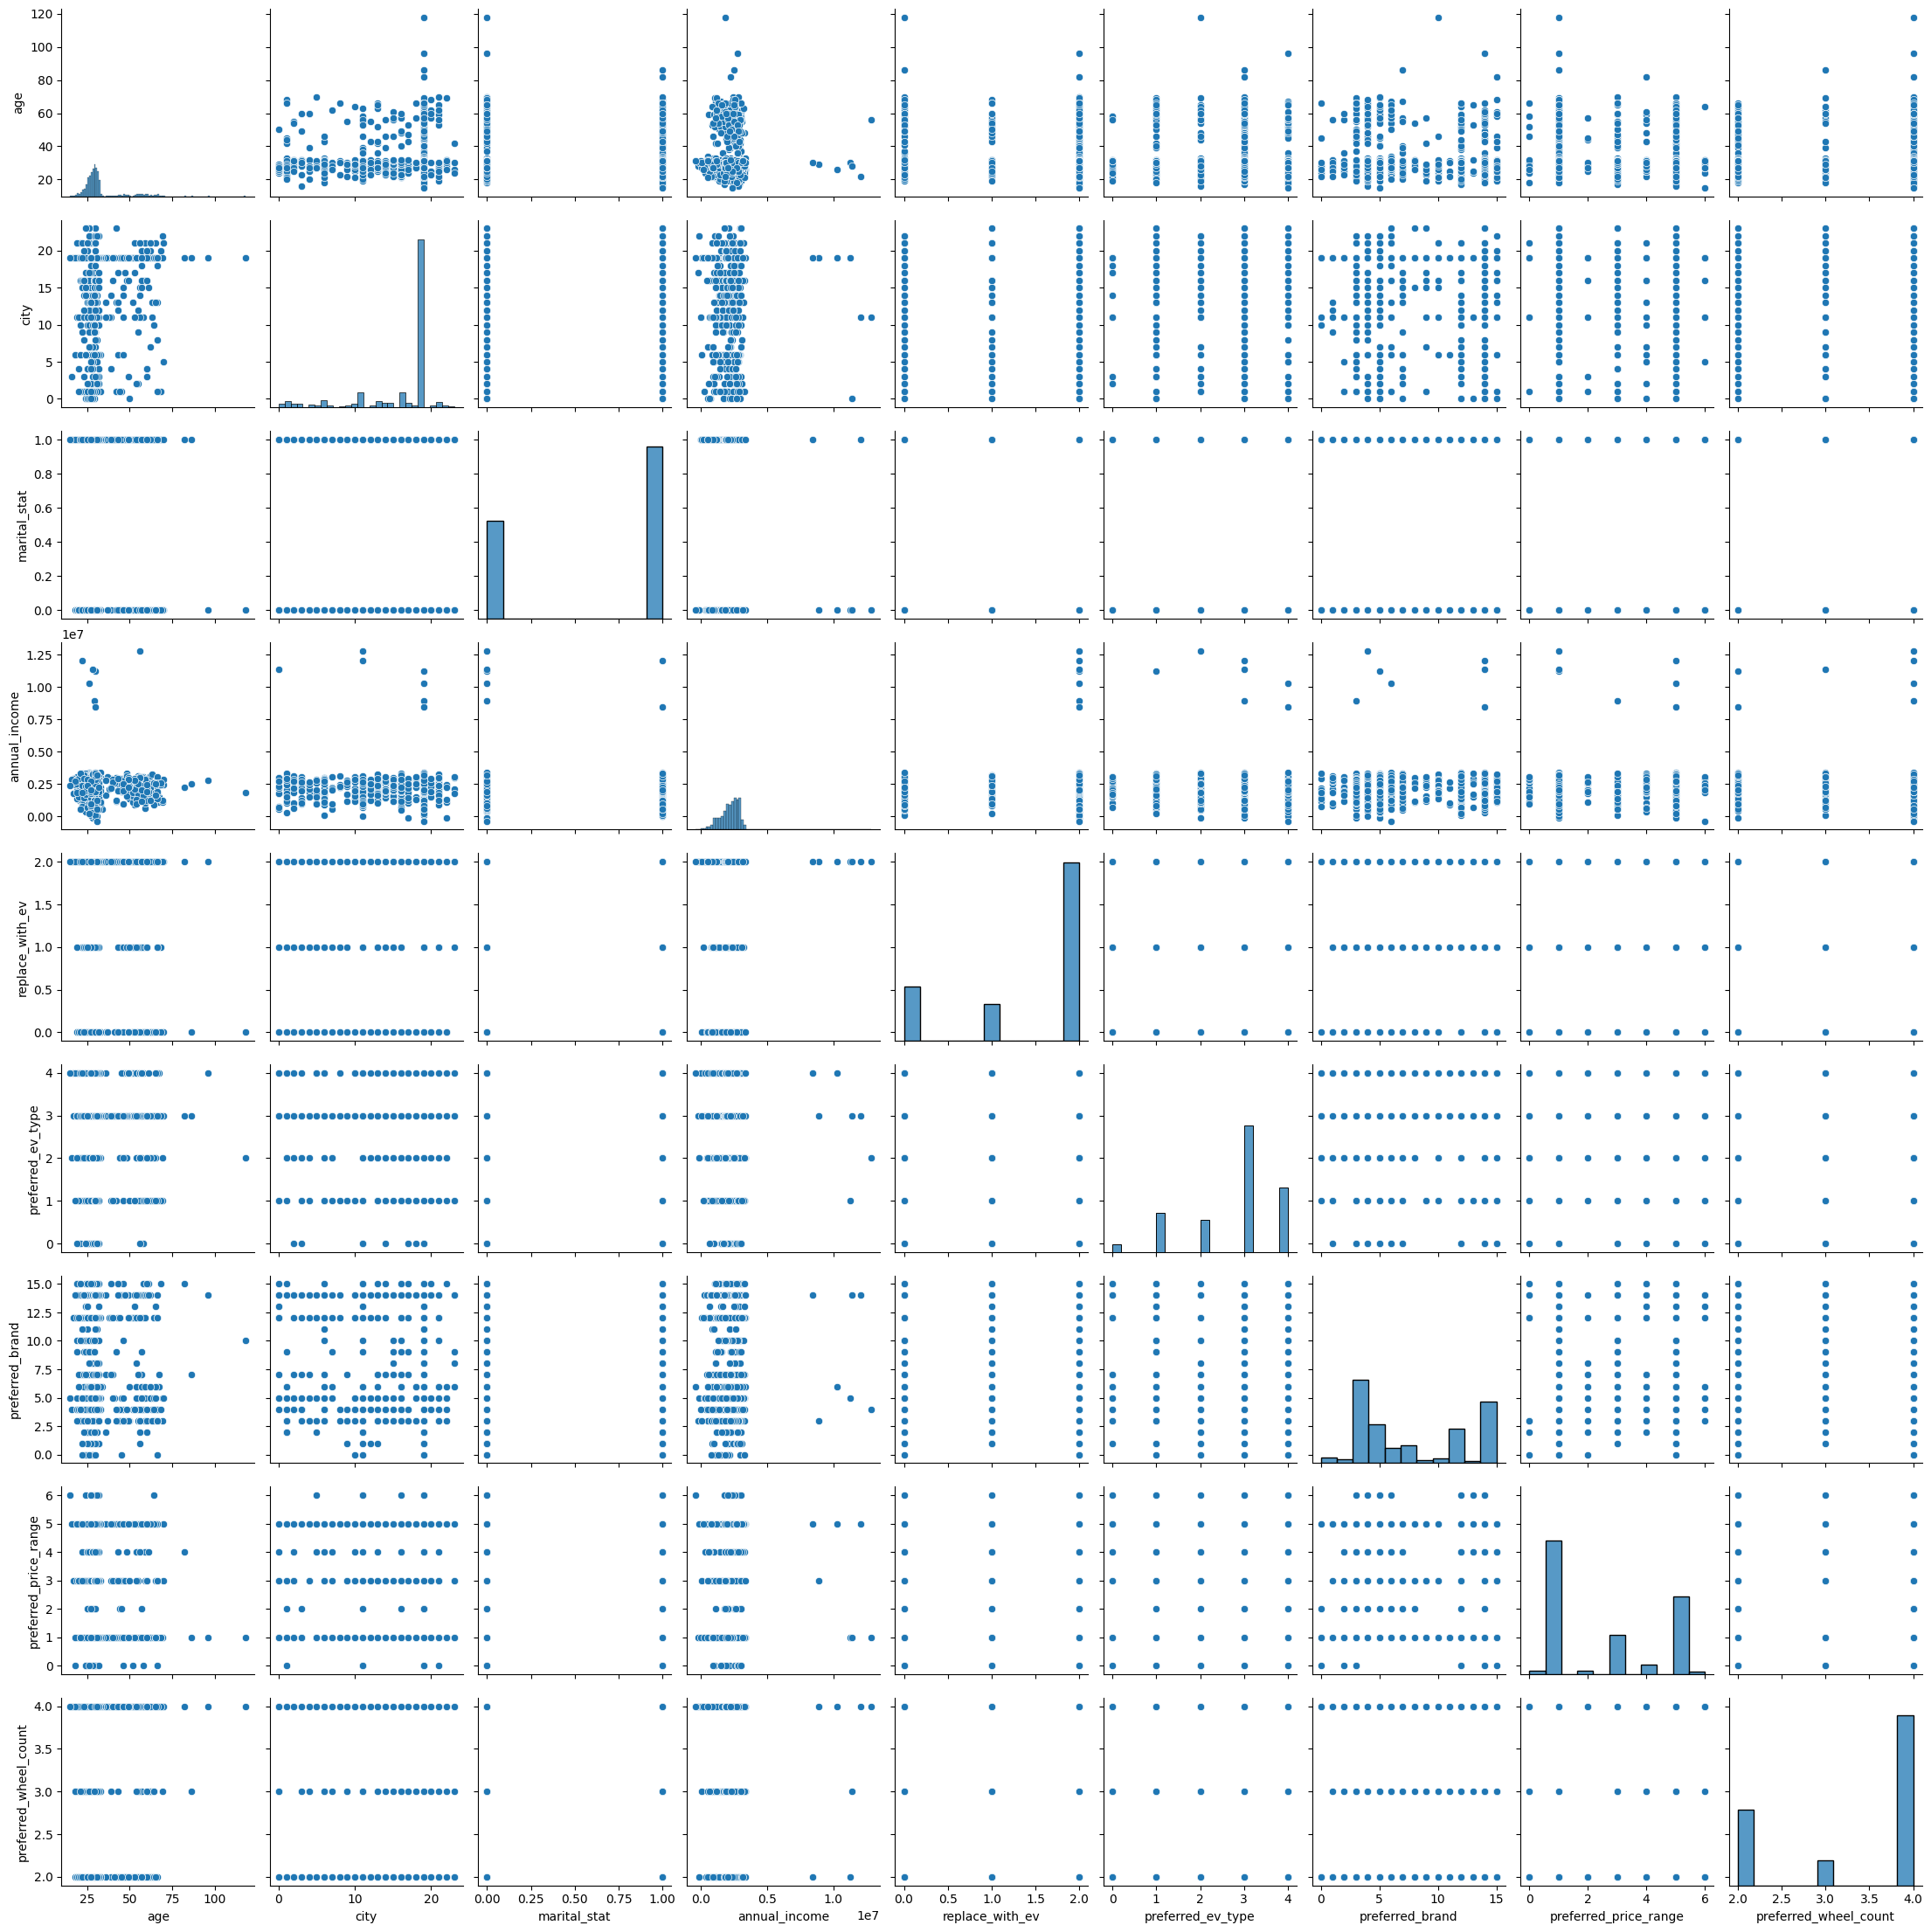

In [26]:
sns.pairplot(df1)

In [25]:
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,1,1.770466e+06,2,3,6,5,2
1,27,0,1,7.600731e+05,2,3,12,1,4
2,28,19,1,2.779701e+06,0,4,3,5,4
3,26,19,1,1.473698e+06,2,4,14,3,2
4,25,19,1,2.430643e+06,2,4,4,1,4


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    990 non-null    int64  
 1   city                   990 non-null    int64  
 2   marital_stat           990 non-null    int64  
 3   annual_income          990 non-null    float64
 4   replace_with_ev        990 non-null    int64  
 5   preferred_ev_type      990 non-null    int64  
 6   preferred_brand        990 non-null    int64  
 7   preferred_price_range  990 non-null    int64  
 8   preferred_wheel_count  990 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.7 KB


In [28]:
col_avg = np.round(df1.mean(), 2)
col_avg

age                           31.80
city                          16.10
marital_stat                   0.64
annual_income            2261179.88
replace_with_ev                1.46
preferred_ev_type              2.74
preferred_brand                7.77
preferred_price_range          2.60
preferred_wheel_count          3.35
dtype: float64

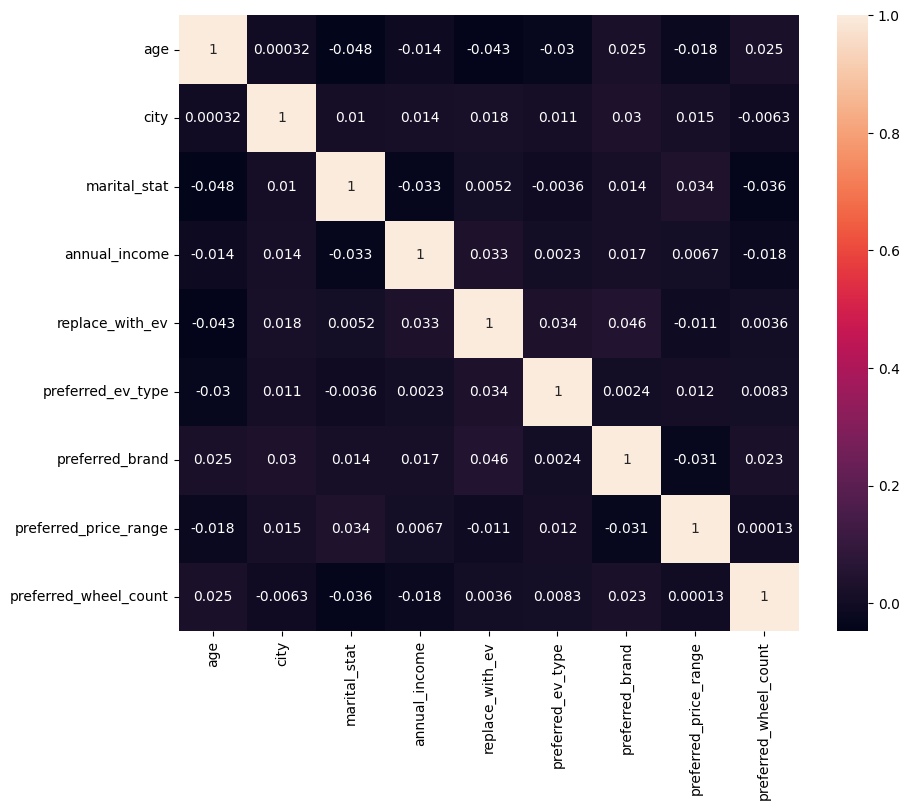

In [29]:
plt.figure(figsize = (10, 8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,-1.524048
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,0.732956
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,0.732956
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,-1.524048
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0.732956


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


In [32]:
df3 = pca.fit_transform(df2)
df3.shape


(990, 2)

In [33]:

pca_df = pd.DataFrame(data = df3, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.232981,-1.337737
1,0.421178,-0.093417
2,-0.199676,-1.500192
3,-1.833504,0.052238
4,-1.026320,0.213170


In [34]:
y = df1['city']
X = df1.drop(['city'],axis=1)



In [35]:
X.head()

,age,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,1,1.770466e+06,2,3,6,5,2
1,27,1,7.600731e+05,2,3,12,1,4
2,28,1,2.779701e+06,0,4,3,5,4
3,26,1,1.473698e+06,2,4,14,3,2
4,25,1,2.430643e+06,2,4,4,1,4


In [36]:
y.head()

0    16
1     0
2    19
3    19
4    19
Name: city, dtype: int64

K MEANS MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

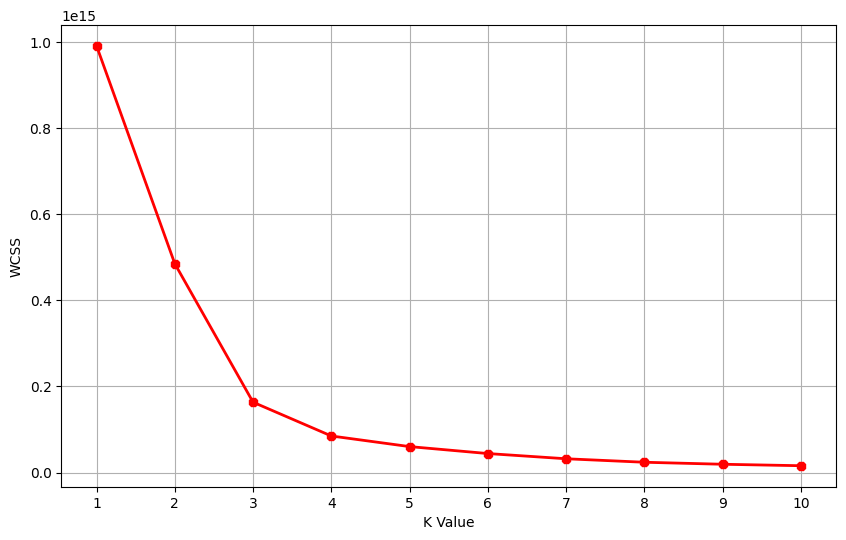

In [37]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [41]:
#We get k value = 3

model = KMeans(4)
model.fit_predict(df3)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


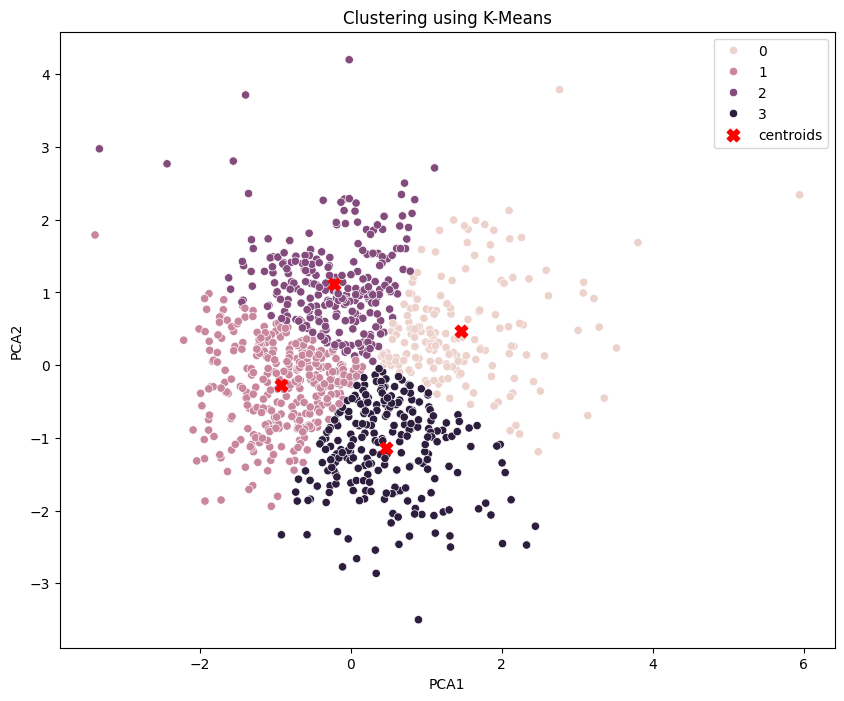

In [42]:

plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

In [43]:
## Creating a target column 'Cluster' for storing clustered segments
new_df = pd.concat([df1, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,16,1,1.770466e+06,2,3,6,5,2,1
1,27,0,1,7.600731e+05,2,3,12,1,4,3
2,28,19,1,2.779701e+06,0,4,3,5,4,3
3,26,19,1,1.473698e+06,2,4,14,3,2,1
4,25,19,1,2.430643e+06,2,4,4,1,4,1


<Axes: xlabel='Cluster', ylabel='count'>

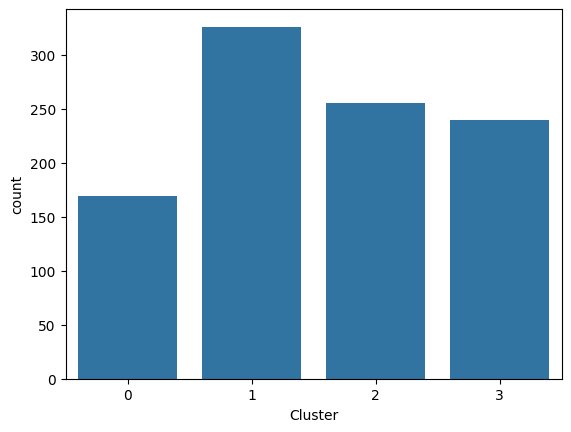

In [44]:
df_0 = new_df[new_df['Cluster'] == 0]
df_1 = new_df[new_df['Cluster'] == 1]
df_2 = new_df[new_df['Cluster'] == 2]
df_3 = new_df[new_df['Cluster'] == 3]
sns.countplot(x = 'Cluster', data = new_df)

In [45]:
cluster_count = new_df['Cluster'].value_counts()
cluster_count

1    326
2    255
3    240
0    169
Name: Cluster, dtype: int64

In [46]:
df4 = new_df.copy()
df4.shape

(990, 10)

In [48]:
df5 = pd.concat([df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df5.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,1
1,27,Ahmedabad,None,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4,3
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,3
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2,1
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4,1


In [49]:
c_0 = df5[df5['Cluster'] == 0]
c_1 = df5[df5['Cluster'] == 1]
c_2 = df5[df5['Cluster'] == 2]
c_3 = df5[df5['Cluster'] == 3]

In [50]:
# List of your datasets
datasets = [c_0, c_1, c_2, c_3]

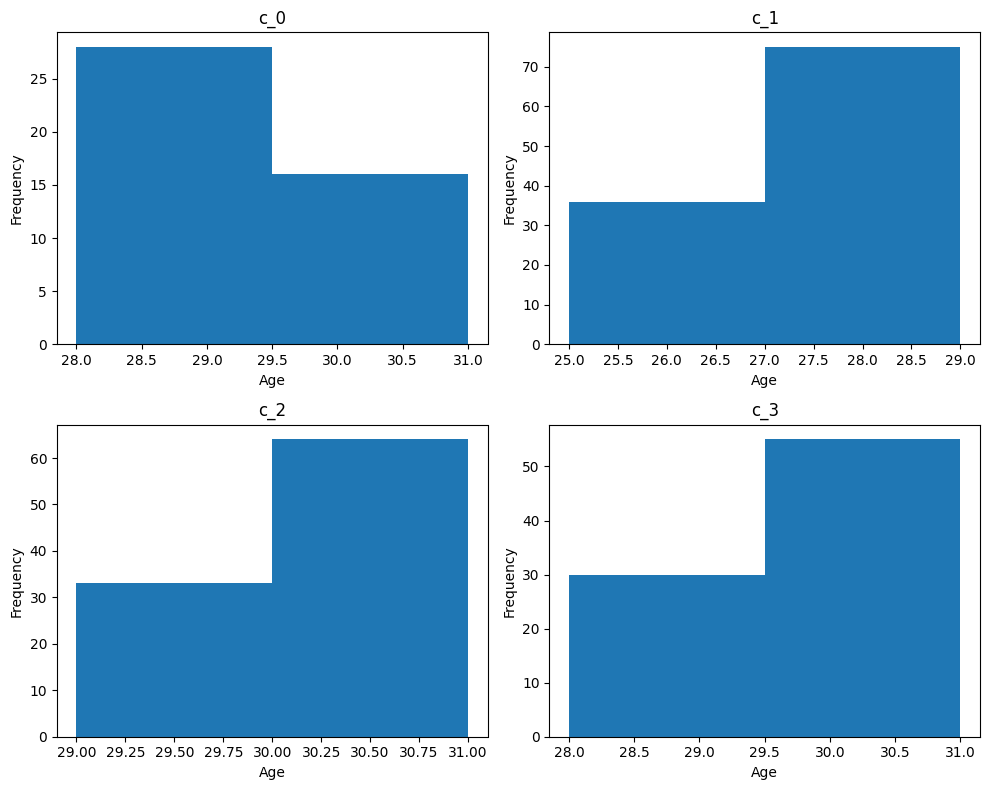

In [51]:



# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ages = dataset['age'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ages.index, bins = 2, weights = top_ages.values)

    # Set labels and titles
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Ages 28 - 30 are to be targeted

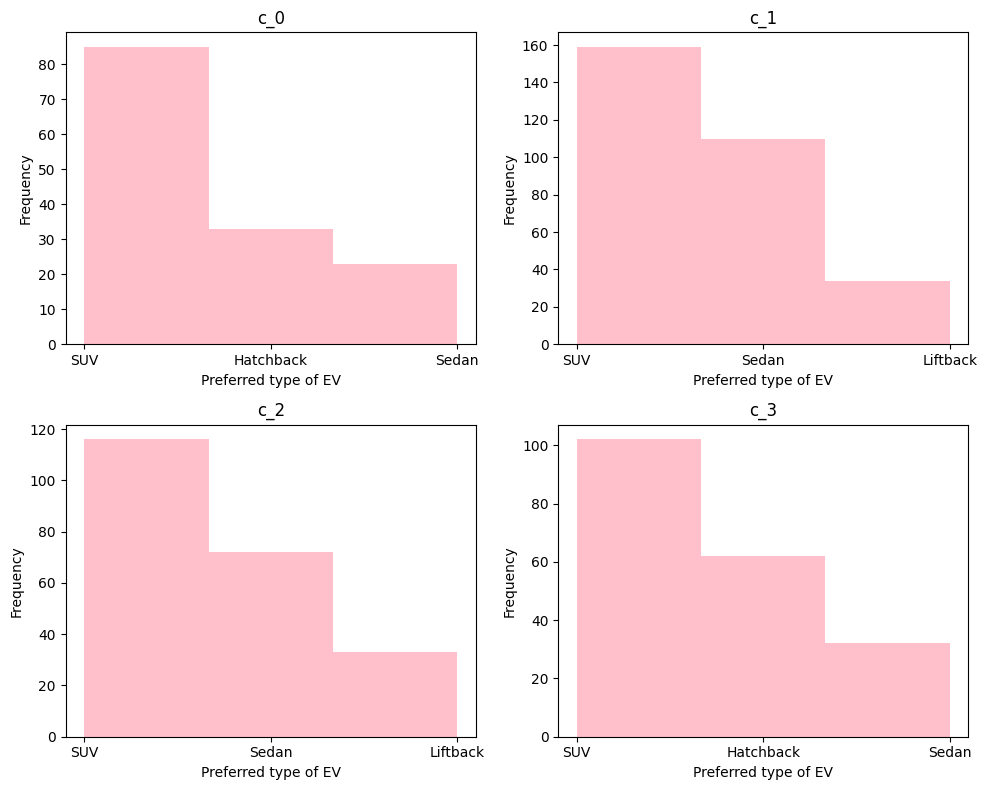

In [52]:
# Create subplots to display histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_ev_type = dataset['preferred_ev_type'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_ev_type.index, bins = 3, weights = top_ev_type.values, color = 'pink')

    # Set labels and titles
    ax.set_xlabel('Preferred type of EV')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**SUV and Sedan are the most popular vehicle type found in all the clusters. So these are to be manufactured in maximum numbers.

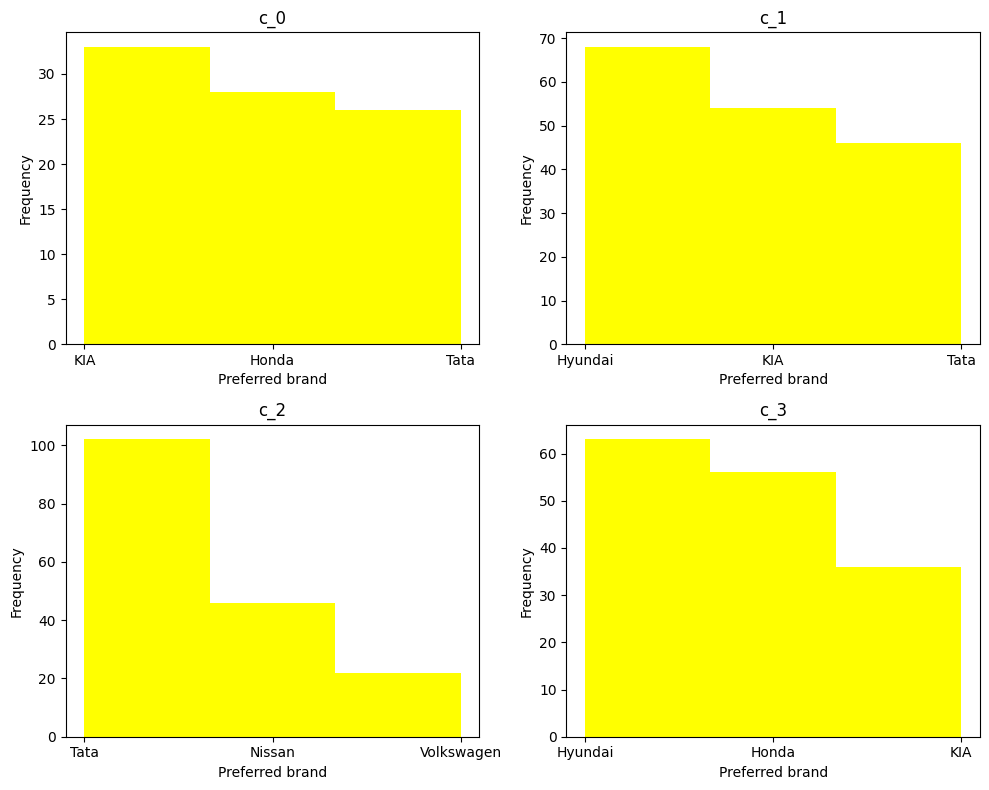

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and create histograms for the top 3 most common ages
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Get the top 3 most common ages and their counts
    top_brand = dataset['preferred_brand'].value_counts().head(3)

    # Create a histogram for the top ages in the current dataset
    ax.hist(top_brand.index, bins = 3, weights = top_brand.values, color = 'yellow')

    # Set labels and titles
    ax.set_xlabel('Preferred brand')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Tata and Kia are the most preferred brand among all the segments.

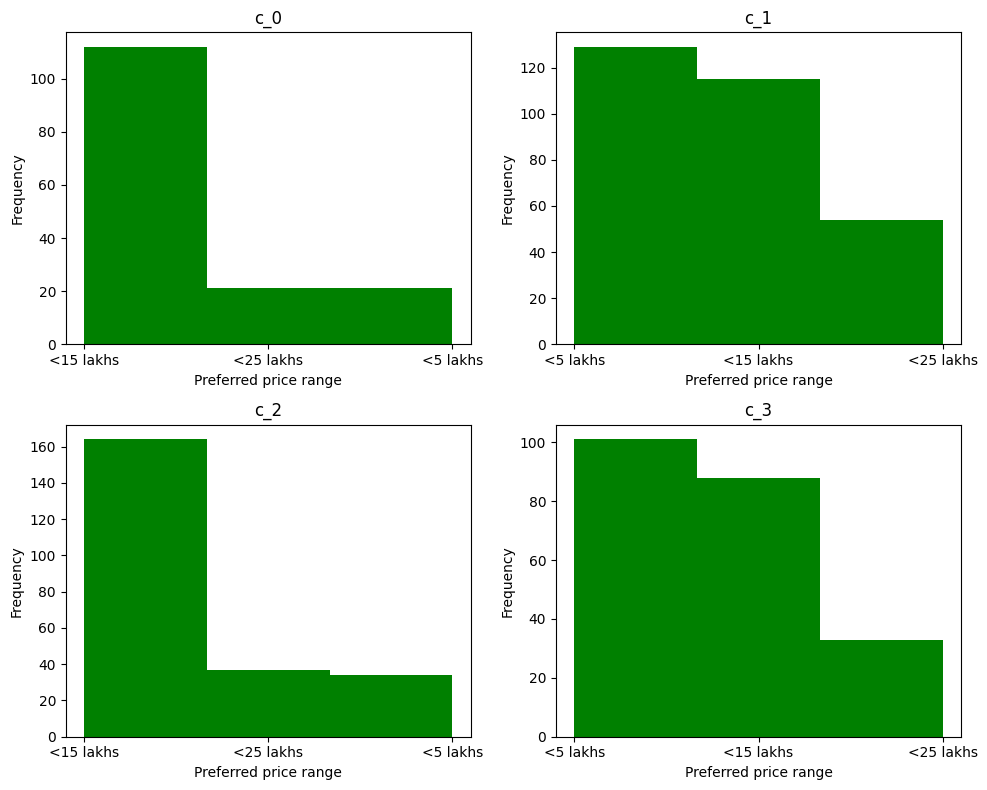

In [54]:
ig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    row = i//2
    col = i%2
    ax = axs[row, col]

    top_price_range = dataset['preferred_price_range'].value_counts().head(3)

    ax.hist(top_price_range.index, bins = 3, weights = top_price_range, color = 'green')

    ax.set_xlabel('Preferred price range')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

plt.tight_layout()

plt.show()

Cars should be produced between marketing price of 5-15 lacs

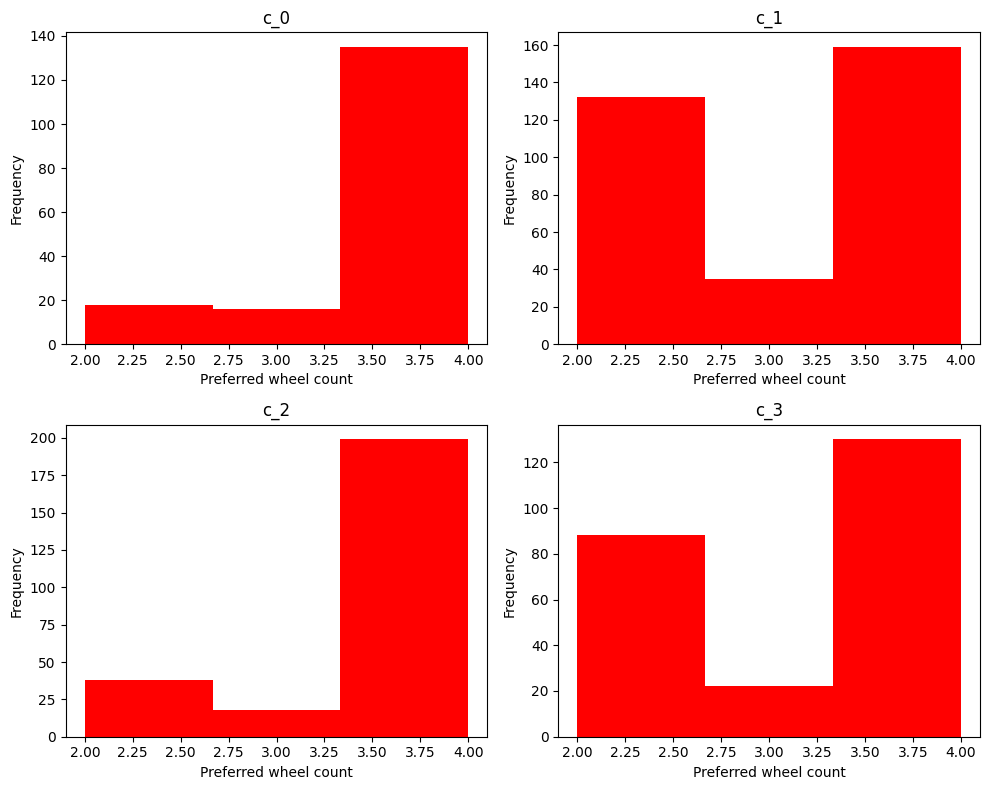

In [55]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i, dataset in enumerate(datasets):
    row = i//2
    col = i%2
    ax = axs[row, col]

    top_count_wheel = dataset['preferred_wheel_count'].value_counts().head(3)

    ax.hist(top_count_wheel.index, bins = 3, weights = top_count_wheel, color = 'red')

    ax.set_xlabel('Preferred wheel count')
    ax.set_ylabel('Frequency')
    ax.set_title(f'c_{i}')

plt.tight_layout()

plt.show()

4 wheeler EV are the most popular with 3 wheeler EV being the least popular in all the segments.

**By this,we can infer most customers want to invest less than 15 lakhs for their EV.t**

**Considering SUV, Sedan and Hatchback as most preferred vehicle type.**

**Considering the money Customers can spend on EV and manufacturing cost for the company wrt. different EV types.text**

.**Company should focus on making 'Sedan' in price range less than 15 lakhs.**

**If company wants to make SUV's, only 15.32% of customers are willing to pay more than 15 lakhs.**

**Demographic segments**
**-Age**
Target Age group of 28-31

**-Income**
**Target who earn Rs. 20,64,995 to Rs. 28,12,149 per year. **

-**Education**
Target Graduates

**Geographic segments**
-**Location**

Pune, Mumbai, New Delhi, Bengaluru Considering based on Segmentation Analysis and the Infrastructres sanctioned by Govt.

**Psychographic segments**
-**Lifestyle**
Target Single Marital Status, Family with 3-5 members